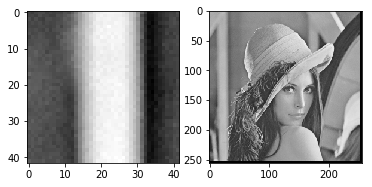

In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

#import anh va fix size

img = cv2.imread('lenna.png', 0)
img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

# do dai x-y

length_x = img.shape[0]
length_y = img.shape[1]
 
# tao anh crop n*n    

def crop_image(img, num_div):
    x = 0
    y = 0
    cropped = []
    len_x = length_x//num_div
    len_y = length_y//num_div
    while x < length_x:
        while y < length_y:
            if y+len_y < length_y and x+len_x < length_x:
                cropped.append(img[x:x+len_x, y:y+len_y])
            y += len_y
        y = 0
        x+=len_x
    return cropped

cropped = crop_image(img, 6)

# i = 0
# while i <=100 :
#     a = random.randint(1,36)
#     b = cropped_img[a]
#     cropped_img.pop(a)
#     cropped_img.append(b)
#     i = i + 1


# tao anh crop n*n  

puzzle = np.zeros((length_x, length_y))
for i in range(len(cropped_img)):
    w, h = cropped_img[i].shape[::-1] 
    img_temp = img.copy()
    
    res = cv2.matchTemplate(img_temp,cropped_img[i],cv2.TM_CCOEFF_NORMED) 
    threshold = 0.997
    location = np.where( res >= threshold)
    x = location[0][0]
    y = location[1][0]
    puzzle[x:x+h, y:y+w] = cropped[i]
    
    
# show anh

f = plt.figure()
f.add_subplot(1,2, 1)     
plt.imshow(cropped_img[12], cmap='gray') 
f.add_subplot(1,2, 2)     
plt.imshow(puzzle, cmap='gray') 

plt.show()